In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import numpy as np

import torch
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset

In [15]:
#create sample data for biosensors on from ios
#One hot encode
#data Anlaysis

### Creating Mock Data Using website [https://www.mockaroo.com/]

In [16]:
medical_data = pd.read_csv("../data - R/assauge-fake_corrolatedData.csv")
df = pd.DataFrame(medical_data)

In [17]:
df.sample(10)


,Timestamp,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
920,2024-03-01 11:36:08,7,97,113.5,66.1,21.47,3.861,297,6.5,6596,322.80,100,89,41,92,14.7,7,3,6.22709
490,2024-03-01 22:19:36,2,69,103.5,64.1,23.67,6.721,289,5.0,1605,123.25,91,111,45,93,14.9,9,7,6.24100
843,2024-03-01 21:43:15,3,80,109.0,69.4,26.32,8.166,171,1.5,2836,127.80,279,9,28,36,12.0,7,6,8.29734
305,2024-03-01 22:55:56,2,71,107.5,61.5,34.57,19.891,77,2.0,2197,94.85,334,4,32,42,13.1,8,6,8.04868
438,2024-03-01 07:33:22,1,67,107.5,68.5,22.55,3.265,219,5.5,832,72.60,250,49,23,43,14.7,2,4,8.78773
699,2024-03-01 10:34:40,8,108,129.0,78.4,25.51,11.113,67,4.0,7982,357.10,339,99,33,36,14.8,9,1,8.89028
872,2024-03-01 21:06:07,7,97,121.5,75.9,28.07,13.441,64,2.5,6662,334.10,368,11,37,44,14.7,10,10,7.07483
487,2024-03-01 07:23:42,2,74,102.0,66.2,32.00,18.550,271,6.0,1937,73.85,174,73,29,29,13.4,3,1,9.04223
496,2024-03-01 00:22:54,7,102,120.0,77.0,34.96,22.398,186,4.5,7459,384.95,191,19,26,24,15.2,3,5,8.38721
308,2024-03-01 19:34:20,6,91,115.5,65.3,32.96,19.798,79,5.0,5654,300.70,383,73,24,48,17.1,10,6,8.26331


In [18]:
df[df["Heart Rate Variability(ms)"] ==  10]


,Timestamp,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
500,2024-03-01 13:38:05,4,83,112.5,64.5,18.8,2.39,86,1.0,4188,167.4,360,107,20,10,16.3,8,10,8.17627


In [19]:
df.describe()

,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.44000,82.260000,111.314000,66.954400,26.45509,10.319617,151.707000,4.285000,4437.441000,222.044050,267.866000,65.433000,32.727000,55.039000,14.160000,5.536000,5.463000,7.631562
std,2.29514,12.732105,7.112031,5.178094,4.88463,6.456865,85.011117,2.314548,2301.390224,120.004347,93.222253,37.553319,7.413463,19.150358,1.923023,2.843728,2.811501,0.773931
min,1.00000,55.000000,93.500000,52.100000,18.00000,-2.364000,0.000000,-1.500000,503.000000,-16.850000,69.000000,1.000000,20.000000,10.000000,9.700000,1.000000,1.000000,5.565870
25%,2.00000,73.000000,106.000000,63.100000,22.23750,4.840750,81.000000,2.500000,2432.500000,121.350000,191.000000,32.750000,26.000000,41.000000,12.700000,3.000000,3.000000,7.097315
50%,4.00000,82.000000,111.500000,67.000000,26.34000,10.108500,152.000000,4.500000,4302.000000,216.775000,269.000000,67.000000,33.000000,55.000000,14.100000,6.000000,5.000000,7.653750
75%,6.00000,92.000000,116.500000,70.700000,30.58000,15.848500,223.000000,6.000000,6460.250000,321.125000,340.250000,98.000000,39.000000,69.000000,15.500000,8.000000,8.000000,8.137595
max,8.00000,110.000000,129.000000,80.800000,34.96000,23.372000,300.000000,10.000000,8497.000000,473.850000,474.000000,130.000000,45.000000,98.000000,19.000000,10.000000,10.000000,9.782730


In [20]:
df[df["Heart Rate Variability(ms)"] ==  10]

,Timestamp,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
500,2024-03-01 13:38:05,4,83,112.5,64.5,18.8,2.39,86,1.0,4188,167.4,360,107,20,10,16.3,8,10,8.17627


In [21]:
df["Activity Trend"].unique()

array([4, 7, 8, 2, 5, 1, 6, 3])

In [22]:
df.corr(numeric_only=True)

,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
Activity Trend,1.000000,0.882226,0.800669,0.624613,-0.014769,-0.011169,0.039478,0.487403,0.991938,0.962051,-0.051300,0.017090,0.006243,0.018763,0.588430,0.012908,-0.015469,-0.244796
Heart Rate(bpm),0.882226,1.000000,0.893741,0.711500,0.018624,0.016340,0.043040,0.427907,0.872958,0.843942,-0.052525,-0.019463,0.012906,0.016889,0.675014,0.006929,-0.014160,-0.139553
Blood Pressure Systolic(mmHg),0.800669,0.893741,1.000000,0.793250,0.018774,0.021905,0.031427,0.377342,0.796131,0.769582,-0.040100,-0.014755,-0.011567,0.006098,0.597241,0.030325,-0.012334,-0.099237
Blood Pressure Diastolic(mmHg),0.624613,0.711500,0.793250,1.000000,-0.000823,0.003483,0.027595,0.285840,0.618796,0.597662,-0.017648,-0.011547,-0.012132,-0.001662,0.464249,0.030634,0.004010,-0.052688
Body Mass Index,-0.014769,0.018624,0.018774,-0.000823,1.000000,0.975804,-0.013971,-0.021399,-0.016854,-0.010948,0.014447,-0.024049,0.002502,-0.065696,-0.008633,0.018684,0.043055,0.152694
Body Fat Percent,-0.011169,0.016340,0.021905,0.003483,0.975804,1.000000,-0.020460,-0.021428,-0.012262,-0.007357,0.015962,-0.020569,0.006182,-0.063315,-0.006530,0.018963,0.043951,0.144880
Time Outside(min),0.039478,0.043040,0.031427,0.027595,-0.013971,-0.020460,1.000000,0.627244,0.052042,0.049255,-0.927135,0.051927,-0.022686,-0.026351,0.038236,0.017072,0.003533,-0.305234
Electrodermal Activity(microsiemens),0.487403,0.427907,0.377342,0.285840,-0.021399,-0.021428,0.627244,1.000000,0.487662,0.471162,-0.589399,0.034556,-0.057065,-0.037886,0.281245,0.028932,-0.011222,-0.244824
Steps,0.991938,0.872958,0.796131,0.618796,-0.016854,-0.012262,0.052042,0.487662,1.000000,0.969705,-0.061694,0.017213,0.006727,0.018995,0.581961,0.008188,-0.019021,-0.250181
Active Energy(cal),0.962051,0.843942,0.769582,0.597662,-0.010948,-0.007357,0.049255,0.471162,0.969705,1.000000,-0.060480,0.012542,0.007269,0.021870,0.563741,0.034235,-0.019238,-0.246007


In [23]:
# sb.pairplot(df)

In [24]:
# df.isna().any()
# df.head()
# df.tail()
# df.describe()
df.describe().corr()

,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
Activity Trend,1.000000,0.996543,0.993462,0.997875,0.999766,0.999881,0.959072,0.999994,-0.398269,0.889339,0.901229,0.993596,0.999592,0.997122,0.999944,0.999998,0.999998,0.999983
Heart Rate(bpm),0.996543,1.000000,0.999085,0.999675,0.998094,0.997197,0.972103,0.996670,-0.341519,0.912596,0.928591,0.996611,0.998494,0.998970,0.997295,0.996668,0.996658,0.996770
Blood Pressure Systolic(mmHg),0.993462,0.999085,1.000000,0.998775,0.995655,0.993940,0.967418,0.993541,-0.344019,0.906941,0.927537,0.992823,0.996087,0.996168,0.994600,0.993591,0.993574,0.993929
Blood Pressure Diastolic(mmHg),0.997875,0.999675,0.998775,1.000000,0.999036,0.998149,0.966242,0.997931,-0.365287,0.902246,0.918848,0.995092,0.999228,0.998392,0.998497,0.997953,0.997943,0.998122
Body Mass Index,0.999766,0.998094,0.995655,0.999036,1.000000,0.999816,0.962603,0.999786,-0.385287,0.895140,0.908331,0.994845,0.999966,0.998154,0.999927,0.999794,0.999792,0.999823
Body Fat Percent,0.999881,0.997197,0.993940,0.998149,0.999816,1.000000,0.963278,0.999922,-0.384372,0.896229,0.907367,0.995199,0.999761,0.998099,0.999867,0.999906,0.999907,0.999832
Time Outside(min),0.959072,0.972103,0.967418,0.966242,0.962603,0.963278,1.000000,0.959873,-0.122765,0.982140,0.983171,0.984911,0.964710,0.977027,0.960102,0.959597,0.959585,0.958624
Electrodermal Activity(microsiemens),0.999994,0.996670,0.993541,0.997931,0.999786,0.999922,0.959873,1.000000,-0.395751,0.890669,0.902404,0.993908,0.999633,0.997332,0.999945,0.999997,0.999997,0.999971
Steps,-0.398269,-0.341519,-0.344019,-0.365287,-0.385287,-0.384372,-0.122765,-0.395751,1.000000,0.063279,0.029166,-0.292331,-0.377787,-0.329659,-0.394356,-0.396576,-0.396597,-0.399455
Active Energy(cal),0.889339,0.912596,0.906941,0.902246,0.895140,0.896229,0.982140,0.890669,0.063279,1.000000,0.993711,0.935108,0.898622,0.920348,0.891045,0.890170,0.890162,0.888634


In [25]:

# df["Activity Trend"].unique()
# df["Sleep Quality(hours)"].unique()
# df["Cardio Fitness(V02 max)"].unique()
# df["Hearing Level(dB)"].unique()
df["Distress Level"].sort_values()


744    5.56587
781    5.67107
485    5.70105
517    5.71360
43     5.75536
        ...   
675    9.59691
273    9.65669
974    9.68864
81     9.75787
333    9.78273
Name: Distress Level, Length: 1000, dtype: float64

In [26]:
df.sample(10)

,Timestamp,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
23,2024-03-01 08:23:56,8,106,127.0,76.2,24.99,10.437,296,9.0,7777,362.85,74,33,22,30,18.6,2,3,8.36173
946,2024-03-01 10:26:20,7,85,116.5,74.9,26.25,8.075,264,5.5,7411,358.55,100,72,28,65,15.5,7,3,6.93604
274,2024-03-01 20:44:40,2,79,112.5,66.5,29.24,14.962,199,4.0,2224,148.20,250,55,31,45,14.9,2,3,8.44891
302,2024-03-01 18:32:16,6,88,114.0,72.4,34.90,21.320,253,5.0,6413,335.65,222,68,36,52,15.8,8,10,6.54987
679,2024-03-01 05:02:22,1,72,111.0,67.6,29.52,15.326,277,5.5,1062,17.10,164,51,41,77,12.2,10,5,7.37048
746,2024-03-01 00:50:11,6,97,118.5,67.1,33.90,18.020,196,8.0,5701,321.05,234,79,27,53,15.7,10,1,8.53854
817,2024-03-01 14:04:03,5,82,114.0,71.4,25.20,8.710,280,4.5,5416,295.80,148,69,39,69,16.2,9,8,6.37884
419,2024-03-01 20:39:25,4,85,113.5,67.1,30.04,13.002,92,1.0,4264,258.20,304,5,41,60,12.5,6,1,8.36641
787,2024-03-01 04:37:21,4,88,114.0,69.4,21.32,4.666,299,8.0,3774,153.70,113,29,29,32,12.8,8,7,7.60466
516,2024-03-01 07:31:20,8,105,125.5,77.3,24.05,5.215,208,8.0,8339,406.95,210,113,36,56,17.5,8,6,7.46886


In [27]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [28]:
df.sample(10)

,Timestamp,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
709,2024-03-01 03:40:38,2,62,105.0,66.0,23.93,7.059,55,1.0,2387,93.35,363,2,38,55,14.2,2,9,7.60743
575,2024-03-01 19:28:11,7,105,119.5,68.7,28.49,12.987,125,4.5,7027,361.35,287,60,26,60,18.5,7,8,7.66078
445,2024-03-01 08:19:25,8,108,120.0,74.0,30.90,17.120,46,3.0,8429,417.45,343,76,41,53,16.8,8,4,8.06451
62,2024-03-01 17:54:58,3,79,114.5,70.7,21.67,2.121,239,3.5,3312,173.60,149,16,33,57,13.9,9,5,7.66443
982,2024-03-01 00:38:26,6,89,112.5,69.5,33.75,20.825,97,3.0,5729,285.45,281,38,20,30,15.9,7,9,7.90166
730,2024-03-01 18:19:52,5,80,107.0,68.2,28.13,14.519,274,8.5,5404,318.20,184,85,38,75,12.0,8,5,6.73846
355,2024-03-01 03:32:43,2,75,102.5,64.5,33.93,19.059,112,0.0,2156,94.80,338,126,28,36,15.5,5,10,8.14839
772,2024-03-01 02:59:56,1,74,104.0,58.4,30.27,13.301,197,4.5,503,8.15,281,115,30,45,13.4,3,10,7.77277
327,2024-03-01 23:27:06,2,67,105.5,60.3,19.00,0.650,100,3.0,2348,73.40,291,73,37,82,14.7,6,5,7.18457
119,2024-03-01 22:43:18,3,80,112.0,72.2,26.06,7.828,88,1.5,3039,114.95,332,70,29,65,13.0,9,1,8.59521


## Attempting to now add corrolations
### reasons 
1. Higher Heart Rate Correlates with Higher Blood Pressure
Explanation: Elevated heart rate can be associated with higher blood pressure. Both are indicators of cardiovascular strain.
2. Higher Blood Pressure Correlates with Increased Risk of Cardiovascular Disease
Explanation: Chronic high blood pressure (hypertension) is a well-established risk factor for cardiovascular diseases such as heart attack and stroke.
3. Higher BMI Correlates with Higher Risk of Diabetes and Cardiovascular Disease
Explanation: A higher Body Mass Index (BMI) is linked with an increased risk of type 2 diabetes and cardiovascular diseases due to the associated excess body fat.
4. Higher Body Fat Percentage Correlates with Lower Physical Activity Levels
Explanation: Increased body fat percentage often correlates with lower levels of physical activity, as excess weight can limit mobility and exercise capability.
5. Higher Physical Activity Correlates with Better Cardio Fitness
Explanation: Regular physical activity improves cardiovascular fitness, enhancing heart and lung function.
6. Higher Heart Rate Variability Correlates with Better Cardiovascular Health
Explanation: Higher heart rate variability (HRV) is associated with better cardiovascular health and lower levels of stress and anxiety.
7. Poor Sleep Quality Correlates with Higher Levels of Stress and Anxiety
Explanation: Poor sleep quality can exacerbate stress and anxiety, leading to a vicious cycle of worsening sleep and increasing stress.
8. Higher Active Energy Expenditure Correlates with Lower BMI
Explanation: Higher levels of physical activity and energy expenditure can help maintain a lower BMI.
9. Higher Steps Count Correlates with Better Cardiovascular Health
Explanation: Higher step counts, indicative of more physical activity, are associated with better cardiovascular health and reduced risk of chronic diseases.
10. Poor Sleep Habits Correlate with Poorer Sleep Quality
Explanation: Poor sleep habits, such as irregular sleep times or insufficient sleep duration, generally lead to poorer sleep quality.
11. Higher Stress Levels Correlate with Higher Levels of Distress
Explanation: Increased stress levels can lead to higher levels of psychological and emotional distress.
12. Higher Electrodermal Activity Correlates with Higher Stress Levels
Explanation: Electrodermal activity (EDA) measures skin conductance, which increases with higher stress and arousal.
13. Higher Body Temperature Correlates with Increased Metabolic Rate
Explanation: Elevated body temperature can indicate increased metabolic activity and energy expenditure.
14. Poor Diet Correlates with Higher Body Fat Percentage
Explanation: Diets high in processed foods and sugars can lead to higher body fat percentage and poor overall health.
15. High Blood Pressure Correlates with Lower Cognitive Function in Older Adults
Explanation: Chronic high blood pressure in older adults can be associated with cognitive decline and increased risk of dementia.

In [29]:
# print(stopper)

Heat map of corrolation

<Axes: >

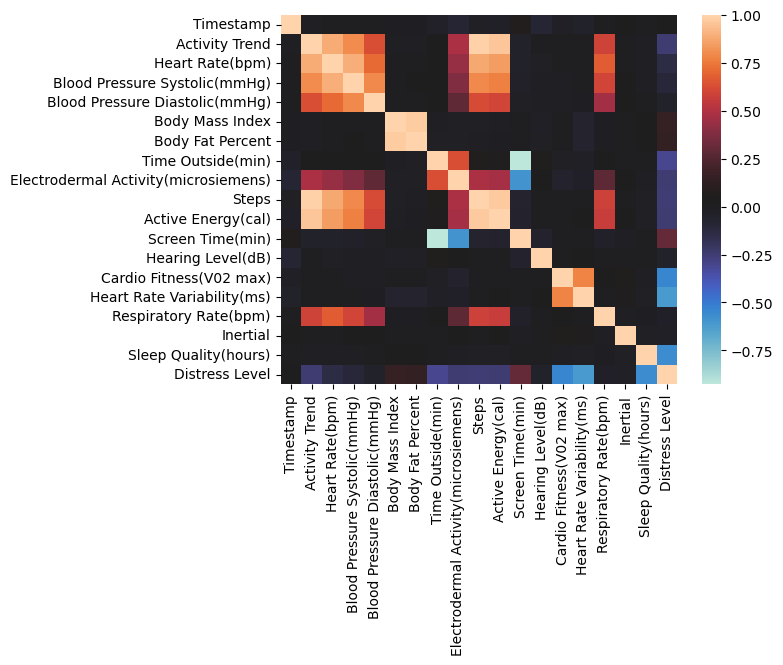

In [30]:
sb.heatmap(df.corr(), cmap = "icefire")

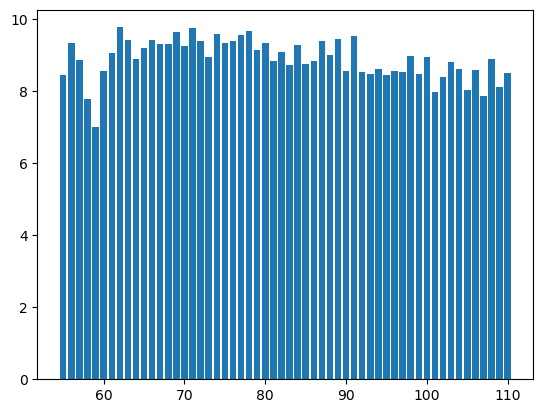

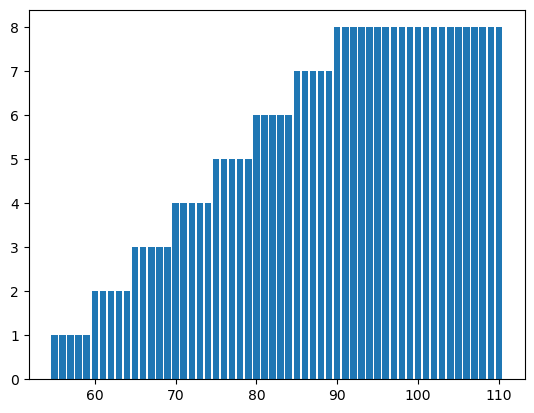

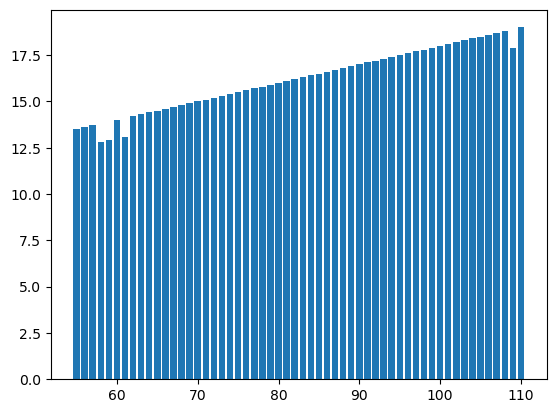

In [31]:
plt.bar(df["Heart Rate(bpm)"], df["Distress Level"])  # Level Of distress is the amount the person pays
plt.show()
plt.bar(df["Heart Rate(bpm)"], df["Activity Trend"]) 
plt.show()
plt.bar(df["Heart Rate(bpm)"], df["Respiratory Rate(bpm)"]) 
plt.show()


In [32]:
feature_df = df.drop(["Distress Level", "Timestamp"], axis = 1)

features = feature_df.values

X = features
y = df["Distress Level"].values.reshape(-1,1)

In [33]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = x_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

#Split our dataset such that our training data is 80% of our total dataset, and testing is the remaining 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=2024)

In [34]:
class assuageData(Dataset): #HousingData Class inherits from Dataset Class from torch.utils.data
    def __init__(self, X, y):
        # initialize our Dataset object with our custom attributes
        self.X = torch.from_numpy(X).type(torch.float) #converting our numpy array into tensors
        self.y = torch.from_numpy(y).type(torch.float)
        self.len = self.X.shape[0] #Number of samples in our dataset

    def __getitem__(self, idx):
        # loads and returns a sample from the dataset at the given index
        return self.X[idx], self.y[idx]
    
    def __len__(self):
        # returns the number of samples in our dataset
        return self.len

In [51]:
# class LinearRegression(nn.Module):
#     def __init__(self,in_dim):
#         #Base class for all neural network modules
#         super(LinearRegression, self).__init__()
#         #Applies a linear transformation to the incoming data: y = Ax + b
#         self.input_layer = nn.Linear(in_dim, 64)
#         self.first_hidden_layer = nn.Linear(64,32)
#         self.second_hidden_layer = nn.Linear(32,16)
#         # self.third_hidden_layer = nn.Linear(16,8)
#         self.output_layer =  nn.Linear(8,1)
    
#     def forward(self,x):
#         x = self.input_layer(x)
#         x = self.first_hidden_layer(x)
#         x = self.second_hidden_layer(x)
#         # x = self.third_hidden_layer(x)
#         x = self.output_layer(x)
#         return x

In [36]:
training_data = assuageData(X_train, y_train)
testing_data = assuageData(X_test, y_test)
training_data.__getitem__(0)

(tensor([0.5714, 0.5273, 0.5211, 0.6655, 0.5206, 0.4349, 0.3867, 0.6087, 0.5293,
         0.5942, 0.4667, 0.4031, 0.2400, 0.4432, 0.6129, 0.1111, 0.1111]),
 tensor([0.7311]))

In [37]:
from torch.utils.data import DataLoader
#DataLoader iterates our dataset in batches of size batch_size
train_loader = DataLoader(training_data, batch_size=32) 
testing_loader = DataLoader(testing_data, batch_size=32)

Trying with linear Regression


In [56]:
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self, in_dim):
        #Base class for all neural network modules
        super(LinearRegression, self).__init__()
        #Applies a linear transformation to the incoming data: y = x @ A.T + b
        self.linear = nn.Linear(in_dim, 1)
    
    
    def forward(self,x):
        out = self.linear(x)
        return out

In [57]:
# from sklearn.preprocessing import PolynomialFeatures

# pf = PolynomialFeatures(degree=2, include_bias=False) 
# X_poly = pf.fit_transform(X)

model = LinearRegression(X_train.shape[1])

print(model)



LinearRegression(
  (linear): Linear(in_features=17, out_features=1, bias=True)
)


In [58]:

criterion = torch.nn.MSELoss() #Mean Square Error Loss Function
optimizer = torch.optim.SGD(model.parameters(),lr=0.01) #Stochastic Gradient Descent

In [59]:
from sklearn.metrics import accuracy_score, f1_score
epochs =50
for i in range(epochs):
    #Setting model to training mode
    model.train()
    total_loss = 0
    predictions = []
    labels = []
    #Iterate through our train_loader
    for batchNum, (X,y) in enumerate(train_loader):
        #Compute prediction and loss
        y_pred = model(X)
        loss = criterion(y_pred, y)

        #Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() 

        total_loss += loss.item()
        predictions.extend((y_pred > 0.5).float().detach().numpy())
        labels.extend(y.detach().numpy())
        # accuracy = accuracy_score(labels, predictions)

    print(f"Epoch {i+1} Curr Loss: {loss.item()}")

Epoch 1 Curr Loss: 0.05869476497173309
Epoch 2 Curr Loss: 0.05264178290963173
Epoch 3 Curr Loss: 0.04903508722782135
Epoch 4 Curr Loss: 0.04581422731280327
Epoch 5 Curr Loss: 0.042917899787425995
Epoch 6 Curr Loss: 0.04030100256204605
Epoch 7 Curr Loss: 0.0379260890185833
Epoch 8 Curr Loss: 0.03576216846704483
Epoch 9 Curr Loss: 0.03378342092037201
Epoch 10 Curr Loss: 0.03196820244193077
Epoch 11 Curr Loss: 0.03029825910925865
Epoch 12 Curr Loss: 0.02875804901123047
Epoch 13 Curr Loss: 0.027334287762641907
Epoch 14 Curr Loss: 0.02601553499698639
Epoch 15 Curr Loss: 0.02479185163974762
Epoch 16 Curr Loss: 0.02365458756685257
Epoch 17 Curr Loss: 0.022596126422286034
Epoch 18 Curr Loss: 0.02160976082086563
Epoch 19 Curr Loss: 0.020689519122242928
Epoch 20 Curr Loss: 0.019830089062452316
Epoch 21 Curr Loss: 0.01902669668197632
Epoch 22 Curr Loss: 0.018275048583745956
Epoch 23 Curr Loss: 0.01757127046585083
Epoch 24 Curr Loss: 0.016911838203668594
Epoch 25 Curr Loss: 0.01629354991018772
Epo

In [60]:
import torch.nn.functional as F

with torch.no_grad():
    loss = 0 
    y_true_list = []
    y_pred_list = []
    #Iterate through our testing_loader
    for i, (X_test, y_true) in enumerate(testing_loader):
        #Predicting batch sample from our testing data using our trained model
        y_pred = model(X_test)

        y_pred = torch.from_numpy(y_scaler.inverse_transform(y_pred))
        y_true = torch.from_numpy(y_scaler.inverse_transform(y_true))
        
        #Adding our predictions and true values to lists
        y_true_list.extend(y_true.flatten().tolist())
        y_pred_list.extend(y_pred.flatten().tolist())
        
        loss += F.mse_loss(y_pred, y_true)
        # loss = np.sqrt(loss)
    print(f'MSE Loss: {loss / i+1}')
        

MSE Loss: 1.1540278224999918


In [61]:

from sklearn.metrics import r2_score, mean_squared_error

# pipeline.predict([[27, 1, 15, 1, 0, 3]])

r2= r2_score(y_true, y_pred)

rmse = np.sqrt(mean_squared_error(y_pred, y_true))
print(f"the r2 score is {r2} and the root mean squared error is {rmse}")

the r2 score is 0.7030780333651926 and the root mean squared error is 0.3197882206271768


In [62]:
# Model Prediction Example - should be 7.154650000000000020
sample_data = np.array([[4,79,109.5,68.7,31.49,18.887,185,5,3880,192,208,74,31,51,14.9,8,9,]])
# 8.4
#1,71,108.5,64.1,31.87,16.381,150,4.5,808,71.4,260,56,20,31,14.1,9,1
sample_data_scaled = x_scaler.transform(sample_data)
sample_tensor = torch.from_numpy(sample_data_scaled).type(torch.float)

with torch.no_grad():
    prediction = model(sample_tensor)

    
prediction_original = y_scaler.inverse_transform(prediction.numpy())
print(f"Predicted Level Of Distress: {prediction_original.flatten()}")

Predicted Level Of Distress: [7.5397544]


In [63]:

sample_input = torch.tensor([4,79,109.5,68.7,31.49,18.887,185,5,3880,192,208,74,31,51,14.9,8,9])
traced_model = torch.jit.trace(model, sample_input)


In [64]:
import json


In [65]:
import coremltools as ct
   # Convert the model to Core ML
mlmodel = ct.convert(
    traced_model,
    inputs= [ct.TensorType(shape=sample_input.shape)]
   
)

labels_json = {"labels": ["Activity Trend","Heart Rate(bpm)","Blood Pressure Systolic(mmHg)","Blood Pressure Diastolic(mmHg)",
                   "Body Mass Index","Body Fat Percent","Time Outside(min)","Electrodermal Activity(microsiemens)","Steps","Active Energy(cal)",
                   "Screen Time(min)","Hearing Level(dB)","Cardio Fitness(V02 max)","Heart Rate Variability(ms)","Respiratory Rate(bpm)","Inertial",
                   "Sleep Quality(hours)"]
               }
mlmodel.type = 'LinearRegression'
mlmodel.user_defined_metadata['com.apple.coreml.preview.params'] = json.dumps(labels_json)


When both 'convert_to' and 'minimum_deployment_target' not specified, 'convert_to' is set to "mlprogram" and 'minimum_deployment_target' is set to ct.target.iOS15 (which is same as ct.target.macOS12). Note: the model will not run on systems older than iOS15/macOS12/watchOS8/tvOS15. In order to make your model run on older system, please set the 'minimum_deployment_target' to iOS14/iOS13. Details please see the link: https://apple.github.io/coremltools/docs-guides/source/target-conversion-formats.html
Model is not in eval mode. Consider calling '.eval()' on your model prior to conversion
Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 10203.05 passes/s]


In [66]:

# Save the converted model
mlmodel.save('../Models/Pytroch_linear_test_model.mlpackage')